Dimensioni dell'array numpy: (60, 1024)
        valori
0     0.577045
1     0.583150
2     0.587546
3     0.593162
4     0.595360
...        ...
1019  0.473504
1020  0.473504
1021  0.473504
1022  0.473260
1023  0.473504

[1024 rows x 1 columns]


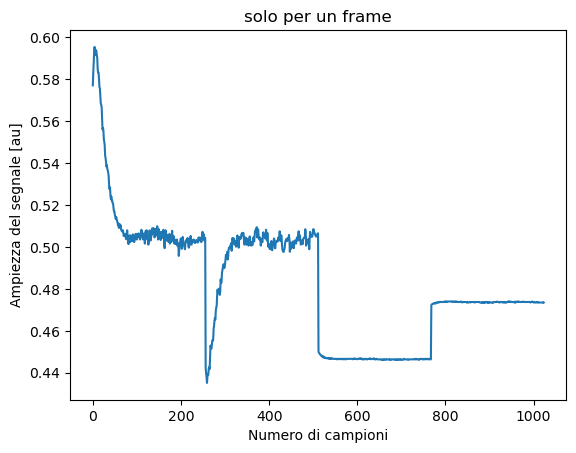

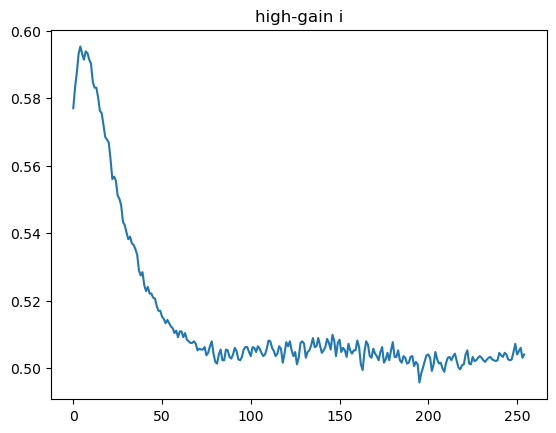

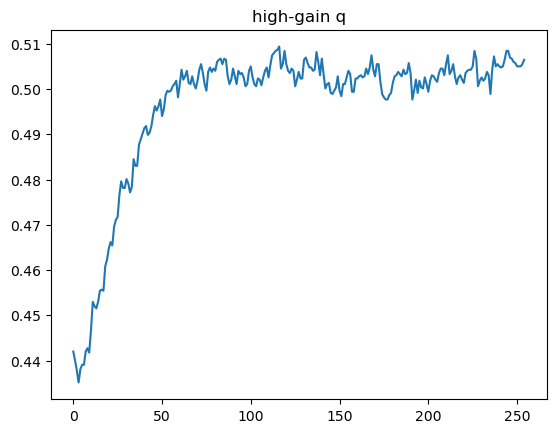

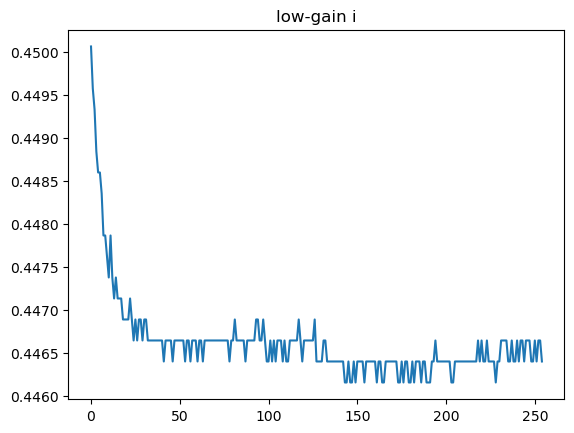

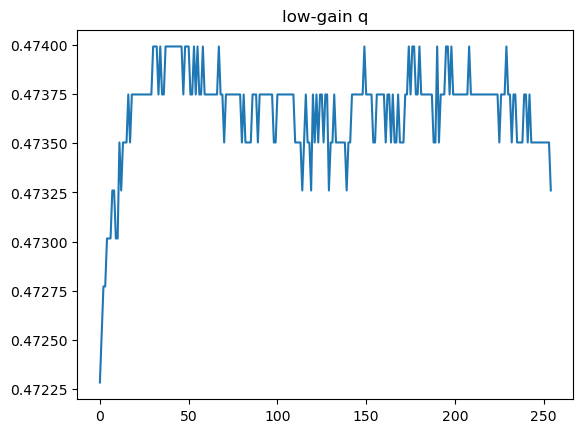

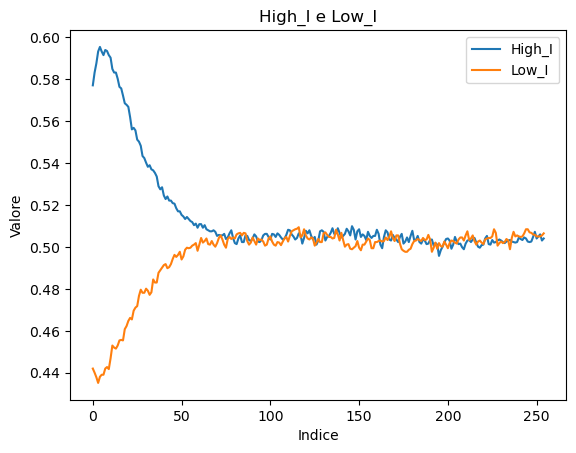

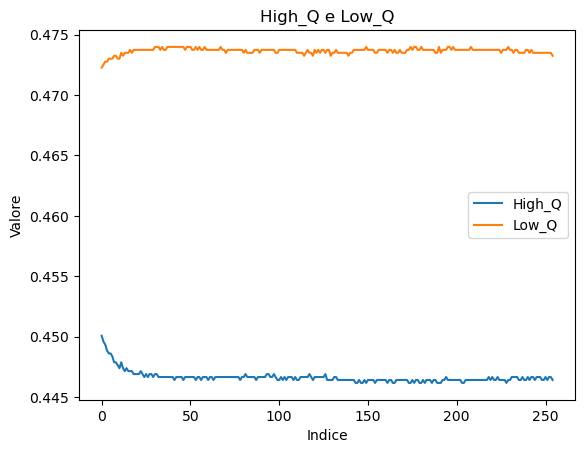

stat=-0.983, p=0.000
Probably dependent


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path = "Desktop/Dati/ProveVere/Sense2GoL Pulse_record_20240530-150450.raw.txt"
with open(file_path, "r") as file:
 # Inizializza una lista vuota per memorizzare i valori dei frame
    frames = []
    # Inizializza una lista vuota per memorizzare i valori di un singolo frame
    frame_values = []
    # Inizializza una variabile contatore per contare il numero di righe lette
    line_count = 0

    # Legge ogni riga del file
    for line in file:
        # Incrementa il contatore di righe
        line_count += 1
        # Ignora le righe di commento e l'intestazione
        if line.startswith('#') or line_count <= 11:
            continue
        # Rimuove eventuali spazi bianchi all'inizio e alla fine della riga
        line = line.strip()
        # Se la riga non è vuota, aggiunge il valore alla lista dei valori del frame corrente
        if line:
            frame_values.append(float(line))
            # Se sono stati letti 512 valori, aggiunge i valori del frame corrente alla lista dei frame
            if len(frame_values) == 1024:
                frames.append(frame_values)
                # Resetta la lista dei valori del frame corrente
                frame_values = []

# Converte la lista dei frame in un array numpy
frames_array = np.array(frames)

# Stampa la forma dell'array numpy per verificarne le dimensioni
print("Dimensioni dell'array numpy:", frames_array.shape)

# Estrae i dati relativi al primo frame dall'array numpy
first_frame_data =frames_array[0]

# dataframe
column_names = ["valori"]
df = pd.DataFrame(first_frame_data, columns=column_names)
print(df)
plt.plot(df['valori'])
plt.title("solo per un frame")
plt.xlabel('Numero di campioni')  # per rappresentare il tempo in microsecondi
plt.ylabel('Ampiezza del segnale [au]')  # per rappresentare il segnale in unità arbitrarie
plt.show()

valori_HI = first_frame_data[0:255] 
plt.plot(valori_HI)
plt.title("high-gain i")
plt.show()

valori_HQ = first_frame_data[256:511] 
plt.plot(valori_HQ)
plt.title("high-gain q")
plt.show()

valori_LI = first_frame_data[512:767] 
plt.plot(valori_LI)
plt.title("low-gain i")
plt.show()

valori_LQ = first_frame_data[768:1023] 
plt.plot(valori_LQ)
plt.title("low-gain q")
plt.show()

# Plot di "High_I" e "Low_I"
plt.plot(first_frame_data[0:255], label='High_I')
plt.plot(first_frame_data[256:511], label='Low_I')
plt.title("High_I e Low_I")
plt.xlabel('Indice')
plt.ylabel('Valore')
plt.legend()
plt.show()

# Plot di "High_Q" e "Low_Q"
plt.plot(first_frame_data[512:767], label='High_Q')
plt.plot(first_frame_data[768:1023], label='Low_Q')
plt.title("High_Q e Low_Q")
plt.xlabel('Indice')
plt.ylabel('Valore')
plt.legend()
plt.show()

from scipy.stats import pearsonr
# Appiattisci gli array per renderli 1D
valori_HI_flat = valori_HI.flatten()
valori_HQ_flat = valori_HQ.flatten()

# Calcola la correlazione di Pearson
stat, p = pearsonr(valori_HI_flat, valori_HQ_flat)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')